# Lemke-Howson: Covariance game

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import quantecon.game_theory as gt
from quantecon import tic, tac, toc

In [3]:
# matplotlib settings
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

Warm-up:

In [4]:
n = 3
g = gt.random_game((n, n))
NE, res = gt.lemke_howson(g, full_output=True)
res

        NE: (array([0.55214966, 0.44785034, 0.        ]), array([0.        , 0.37941346, 0.62058654]))
 converged: True
      init: 0
  max_iter: 1000000
  num_iter: 4

## 20 actions, varying $\rho$

In [5]:
seed = 0
n = 20
num_rhos = 101
num_reps = 500  # for each value of rho

random_state = np.random.RandomState(seed)
rhos = np.linspace(-1, 1, num_rhos)
times = np.empty((num_rhos, num_reps))
nums_iter = np.empty((num_rhos, num_reps), dtype=int)
converged = np.empty((num_rhos, num_reps), dtype=bool)

for i in range(num_rhos):
    for j in range(num_reps):
        g = gt.covariance_game((n, n), rho=rhos[i], random_state=random_state)
        tic()
        NE, res = gt.lemke_howson(g, full_output=True)
        times[i, j] = tac(verbose=False)
        nums_iter[i, j] = res.num_iter
        converged[i, j] = res.converged
    msg = '.' if converged[i].all() else 'F'
    print(msg, end='')

.....................................................................................................

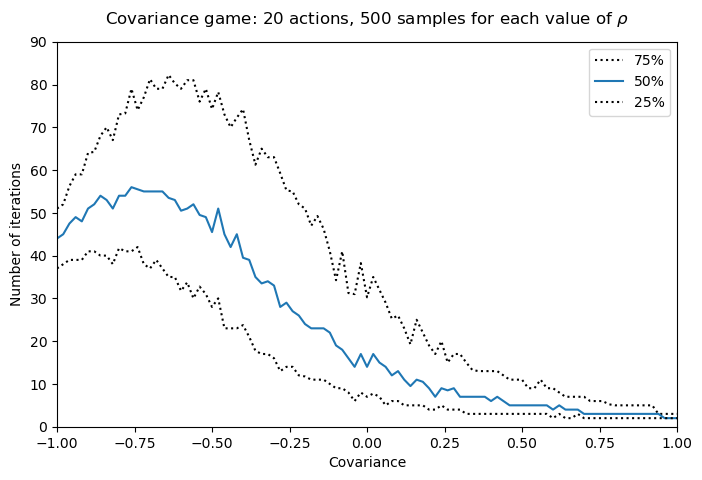

In [6]:
fig, ax = plt.subplots(figsize=(8, 5))
percentiles = [75, 50, 25]
styles = [':', '-', ':']
colors = ['k', None, 'k']
for q, s, c in zip(percentiles, styles, colors):
    ax.plot(rhos, np.percentile(nums_iter, q, axis=1),
            s, color=c, label='{}%'.format(q))
ax.set_xlabel('Covariance')
ax.set_ylabel('Number of iterations')
ax.set_title(
    'Covariance game: ' +
    r'{0} actions, {1} samples for each value of $\rho$'.format(n, num_reps),
    y=1.025
)
plt.legend()
plt.show()

## 100 actions, varying $\rho$

In [7]:
seed = 0
n = 100
num_reps = 300

random_state = np.random.RandomState(seed)
rhos = random_state.uniform(-1, 1, num_reps)
times = np.empty(num_reps)
nums_iter = np.empty(num_reps, dtype=int)
converged = np.empty(num_reps, dtype=bool)

for i in range(num_reps):
    g = gt.covariance_game((n, n), rho=rhos[i], random_state=random_state)
    tic()
    NE, res = gt.lemke_howson(g, full_output=True)
    times[i] = toc(verbose=False)
    nums_iter[i] = res.num_iter
    converged[i] = res.converged
    msg = '.' if converged[i] else 'F'
    print(msg, end='')

............................................................................................................................................................................................................................................................................................................

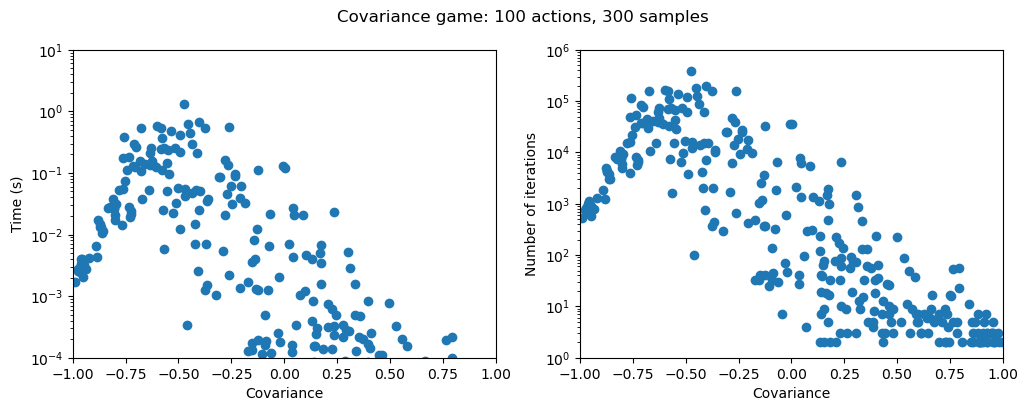

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].scatter(rhos, times)
axes[1].scatter(rhos, nums_iter)
for ax in axes:
    ax.set_xlim(-1, 1)
    ax.set_xlabel('Covariance')
axes[0].set_yscale('log')
axes[0].set_ylim(1e-4, 10)
axes[0].set_ylabel('Time (s)')
axes[1].set_yscale('log')
axes[1].set_ylabel('Number of iterations')
fig.suptitle('Covariance game: {0} actions, {1} samples'.format(n, num_reps))
plt.show()

## $\rho = -0.7$, varying game size

In [9]:
seed = 0
ns = [10*i for i in range(1, 11)]
rho = -0.7
num_reps = 20  # for each value of n

random_state = np.random.RandomState(seed)
times = np.empty((len(ns), num_reps))
nums_iter = np.empty((len(ns), num_reps), dtype=int)
converged = np.empty((len(ns), num_reps), dtype=bool)

for i, n in enumerate(ns):
    for j in range(num_reps):
        g = gt.covariance_game((n, n), rho=rho, random_state=random_state)
        tic()
        NE, res = gt.lemke_howson(g, full_output=True)
        times[i, j] = tac(verbose=False)
        nums_iter[i, j] = res.num_iter
        converged[i, j] = res.converged
    msg = '.' if converged[i].all() else 'F'
    print(msg, end='')

..........

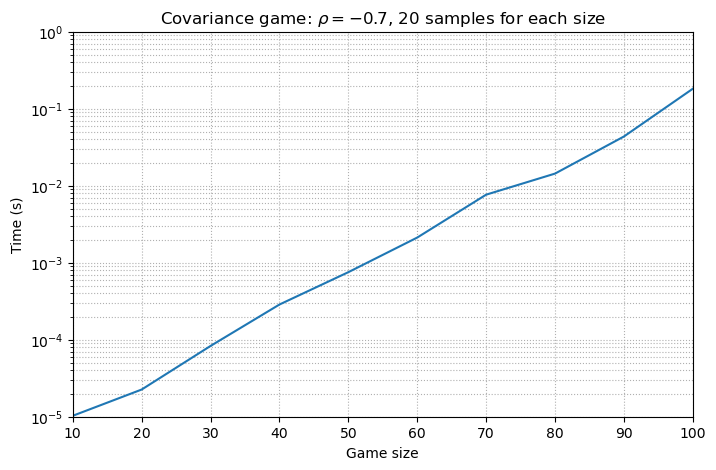

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(ns, times.mean(axis=1))
ax.set_xticks(ns)
ax.set_yscale('log')
ax.grid(linestyle=':', which='both')
ax.set_xlabel('Game size')
ax.set_ylabel('Time (s)')
ax.set_title(
    'Covariance game: ' +
    r'$\rho = {0}$, {1} samples for each size'.format(rho, num_reps)
)
plt.show()

In [11]:
import platform
import psutil
import sys

print(f"OS: {platform.system()} {platform.release()}")
print(f"Machine: {platform.machine()}")
print(f"Processor: {platform.processor()}")
print(f"CPU Cores: {psutil.cpu_count(logical=False)} (Physical), {psutil.cpu_count(logical=True)} (Logical)")
print(f"Total RAM: {round(psutil.virtual_memory().total / (1024**3), 2)} GB")
print(f"Python Version: {sys.version.split()[0]}")
print(f"QuantEcon.py Version: {__import__('quantecon').__version__}")
print(f"NumPy Version: {np.__version__}")
print(f"Numba Version: {__import__('numba').__version__}")

OS: Darwin 24.3.0
Machine: arm64
Processor: arm
CPU Cores: 14 (Physical), 14 (Logical)
Total RAM: 48.0 GB
Python Version: 3.12.9
QuantEcon.py Version: 0.8.0
NumPy Version: 2.1.3
Numba Version: 0.61.0
